___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://media.istockphoto.com/id/1493874000/es/vector/ilustraci%C3%B3n-de-medicina-preventiva.jpg?s=612x612&w=0&k=20&c=A3E4XsVlmY0Q7P1WQJFBenx2uqldGBL2BLK0cTKbWT0=" width="400px" height="180px" />


# <font color= #bbc28d> **EXAMEN 3** </font>
#### <font color= #2E9AFE> `Proyecto 3 - Modelo para predecir el nivel de severidad de una enfermedad`</font>
- <Strong> -- </Strong>
- <Strong> Fecha </Strong>: 26/03/2025



___

<p style="text-align:right;"> Imagen recuperada de: https://media.istockphoto.com/id/1493874000/es/vector/ilustraci%C3%B3n-de-medicina-preventiva.jpg?s=612x612&w=0&k=20&c=A3E4XsVlmY0Q7P1WQJFBenx2uqldGBL2BLK0cTKbWT0=</p>

## <font color= #bbc28d> **Objetivo** </font>
El objetivo del proyecto es utilizar técnicas de aprendizaje automático supervisado para construir un modelo capaz de predecir el `nivel de severidad` de una enfermedad. Se utilizará una base de datos que contiene información clínica y factores de riesgo relacionados a dicha enfermedad. 

## <font color= #bbc28d> **Caso 1 - Regresión Logística** </font>

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import re

In [249]:
# Cargar los datos
df = pd.read_csv('Datasets/train_data.csv')
df.head()

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,Male,272,68,188,82,124,Non-smoker,No,High
1,29,Female,275,68,183,84,129,Non-smoker,No,High
2,50,Male,268,55,189,111,119,Non-smoker,No,High
3,78,Female,194,50,120,94,113,Non-smoker,No,High
4,63,Male,229,35,182,214,160,Smoker,Yes,High


In [250]:
# Comprobar si existen valores nulos
df.isnull().sum()

Age         0
Sex         0
TCh         0
HCh         0
LCh         0
Tr          0
BPS         0
Sm          0
Diabetes    0
Pred        0
dtype: int64

No contamos con datos nulos, por lo que no habrá que realizar alguna imputación.

In [251]:
# Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include='number').columns

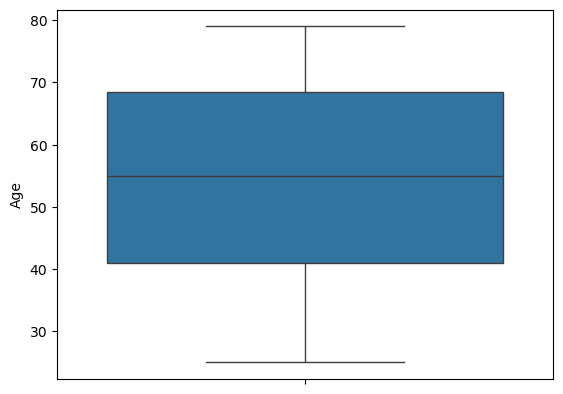

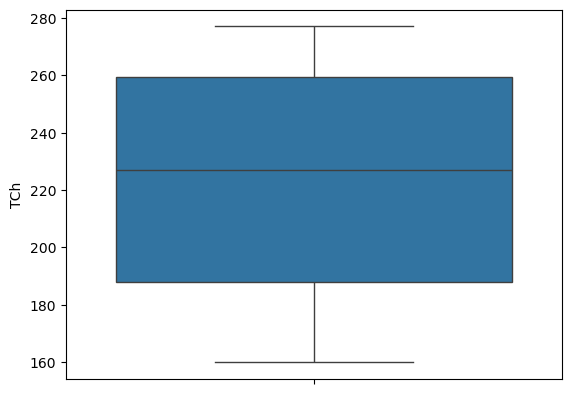

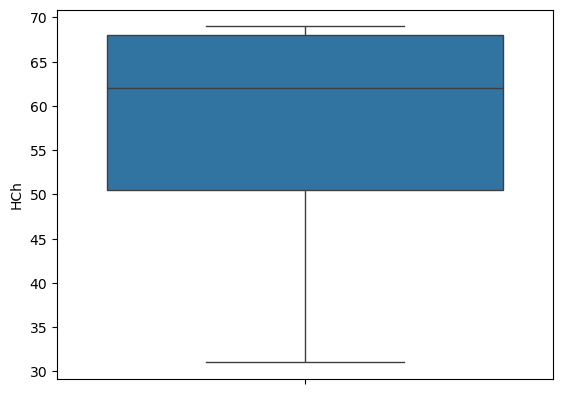

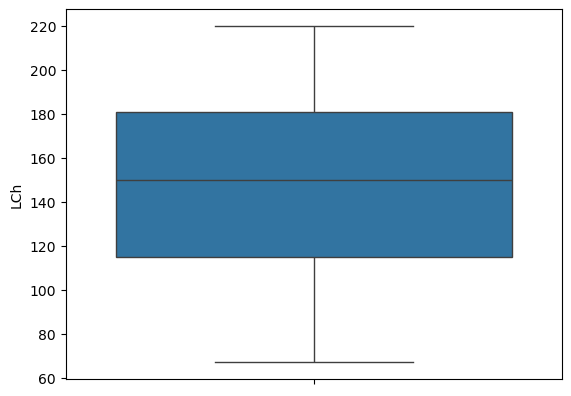

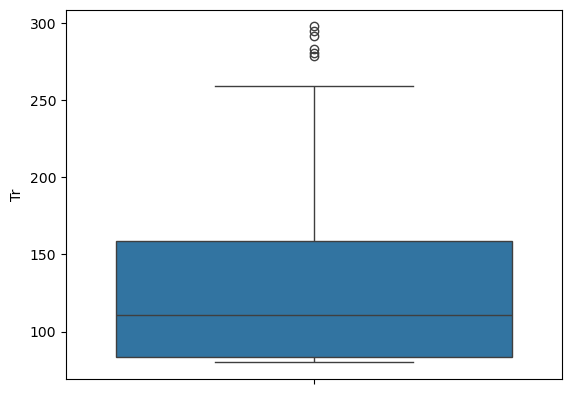

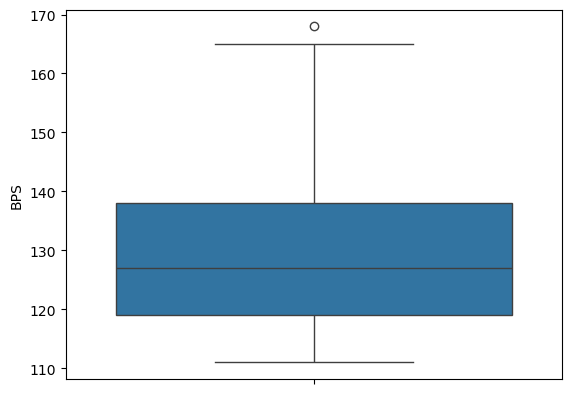

In [252]:
# Verificar si hay datos atípicos
for i in df_numericas:
    sns.boxplot(df[i])
    plt.show()

Contamos con algunos datos atípicos en la columna `Tr` la cuál creemos que hace referencia a los `Triglicéridos`. Los valores atípicos rondan entre los 250 y los 300 que si bien son niveles **altos** e irregulares en personas "sanas", no son valores imposibles de obtener en un estudio si es que cuentas con otro tipo de factores como obesidad o diabetes, entre otras más, por lo que no los trataremos y veremos que tal le va al modelo.

In [253]:
# Medidas de ditribución básica
df.describe()

,Age,TCh,HCh,LCh,Tr,BPS
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,53.369748,224.546218,57.739496,147.260504,132.126050,129.823529
std,16.096039,37.481464,11.393919,39.228462,60.799553,14.550116
min,25.000000,160.000000,31.000000,67.000000,80.000000,111.000000
25%,41.000000,188.000000,50.500000,115.000000,83.500000,119.000000
50%,55.000000,227.000000,62.000000,150.000000,111.000000,127.000000
75%,68.500000,259.500000,68.000000,181.000000,159.000000,138.000000
max,79.000000,277.000000,69.000000,220.000000,298.000000,168.000000


In [254]:
# Codificar las variables categóricas [binario]
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Sm'] = df['Sm'].map({'Smoker': 1, 'Non-smoker': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})

# Codificar la target [3 clases]
df['Pred'] = df['Pred'].map({'Low': 0, 'Medium': 1, 'High': 2})

df.head()

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,1,272,68,188,82,124,0,0,2
1,29,0,275,68,183,84,129,0,0,2
2,50,1,268,55,189,111,119,0,0,2
3,78,0,194,50,120,94,113,0,0,2
4,63,1,229,35,182,214,160,1,1,2


<Axes: xlabel='Pred', ylabel='count'>

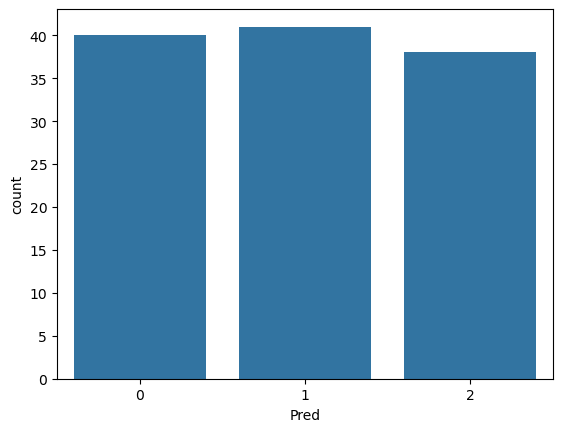

In [255]:
# Ver la distribución de las clases
sns.countplot(x='Pred', data=df)

Vemos que nuestros datos están bastante balanceados en sus clases por lo que no hay necesidad de emplear técnicas de Oversampling o Undersampling.

In [256]:
# Dividir nuestros datos en conjunto de prueba y entrenamiento
X = df.drop(['Pred'], axis=1) 
y = df['Pred'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [257]:
# Escalar los datos
sc = StandardScaler()

# Solo escalar las variables que originalmente eran numéricas
X_train_num = X_train[df_numericas]
X_test_num = X_test[df_numericas]

# Dividir en 2 los datos
X_train_cat = X_train.drop(columns=df_numericas)
X_test_cat = X_test.drop(columns=df_numericas)

# Entrenar y transformar
X_train_sc = pd.DataFrame(sc.fit_transform(X_train_num), columns=df_numericas, index=X_train.index)
X_test_sc = pd.DataFrame(sc.transform(X_test_num), columns=df_numericas, index=X_test.index)

# Juntar ambas partes
X_train_final = pd.concat([X_train_sc,X_train_cat], axis=1)
X_test_final = pd.concat([X_test_sc,X_test_cat], axis=1)

In [258]:
from sklearn.model_selection import GridSearchCV

# Lista de combinaciones válidas
param_grid = [
    {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['lbfgs','newton-cg','sag','saga', 'newton-cholesky','liblinear']},
    {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
    {'penalty': [None], 'solver': ['lbfgs','newton-cg','sag','saga', 'newton-cholesky']}
]

# Modelo base
logreg = LogisticRegression(max_iter=10000)

# Configurar GridSearchCV
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro', verbose=1)

# Ajustar el modelo
grid.fit(X_train_final, y_train)

print("Mejores parámetros:", grid.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores parámetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [259]:
# Predecir con el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_final)

# Métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.86      0.75      0.80         8
           2       1.00      0.88      0.93         8

    accuracy                           0.88        24
   macro avg       0.89      0.88      0.87        24
weighted avg       0.89      0.88      0.87        24


Matriz de confusión:
[[8 0 0]
 [2 6 0]
 [0 1 7]]


## <font color= #bbc28d> **Caso 2 - Support Vector Machine** </font>